## Morfoloģiskās marķēšanas rīki
## Some tools for Part of Speech (POS) Tagging  

In [ ]:
!pip install nltk spacy stanza
import nltk
import spacy
import stanza

# POS tagging with NLTK

A fast and accurate part-of-speech tagger based on the Averaged Perceptron.
NLTK	tagger accuracy - 94.0%
More info: https://github.com/sloria/textblob-aptagger?tab=readme-ov-file


In [ ]:
nltk.download('punkt_tab') # before 'punkt'
from nltk.tokenize import word_tokenize

text='Time flies like an arrow.'
tokens=word_tokenize(text)
print(tokens)

nltk.download('averaged_perceptron_tagger_eng') #before averaged_perceptron_tagger


# Alternative
#from nltk.tag import pos_tag
#nltk.pos_tag(tokens)

# POS tagging with Spacy

More information: https://spacy.io/usage/linguistic-features


In [ ]:
nlp=spacy.load("en_core_web_sm")
spacy_doc=nlp(text)
for token in spacy_doc:
     print(token,token.pos_)

# POS tagging with Stanza

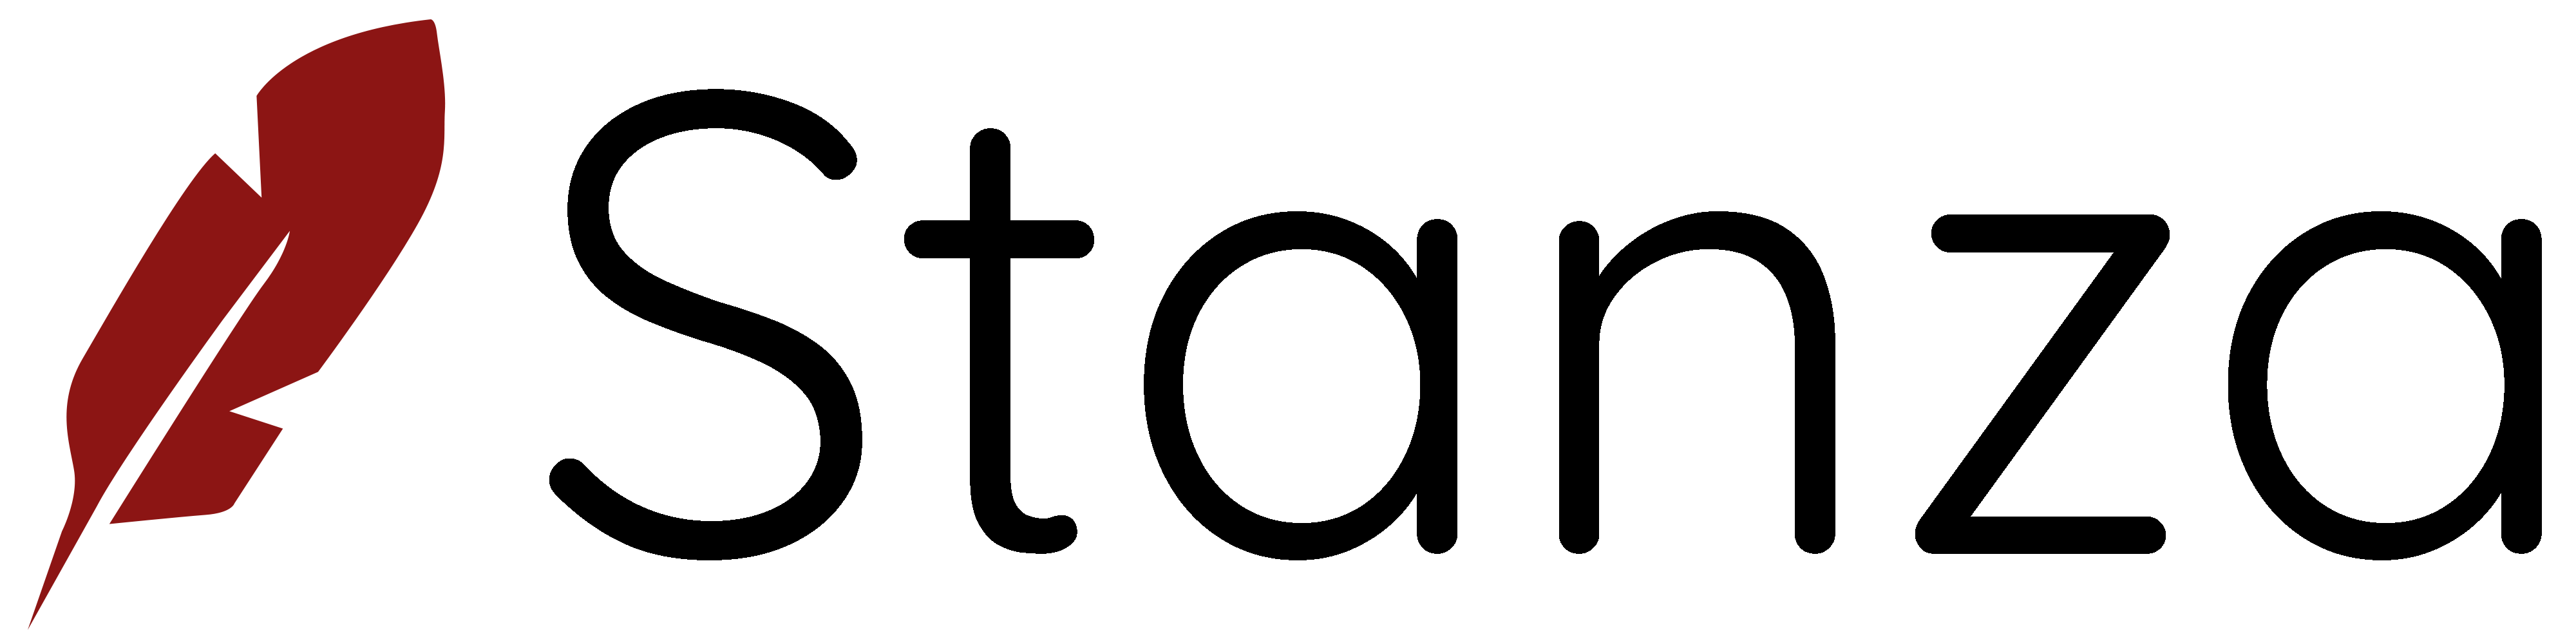


Stanza is a Python natural language analysis package. It contains tools, which can be used in a pipeline, to convert a string containing human language text into lists of sentences and words, to generate base forms of those words, their parts of speech and morphological features, to give a syntactic structure dependency parse, and to recognize named entities. The toolkit is designed to be parallel among more than 70 languages, using the Universal Dependencies formalism.

More info about POS tagging: https://stanfordnlp.github.io/stanza/pos.html

Stanza performance: https://stanfordnlp.github.io/stanza/performance.html

More info about Stanza: https://stanfordnlp.github.io/stanza/

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos', logging_level="ERROR")
doc = nlp(text)
print(*[f'{word.text}\t{word.upos}' for sent in doc.sentences for word in sent.words], sep='\n')

In [ ]:
lv_text = "Es baros, ka puiši iet baros, jo kurš gan zirgus baros."

nlp_lv = stanza.Pipeline(lang='lv', processors='tokenize,pos', logging_level="ERROR")
doc = nlp_lv(lv_text)
print(*[f'{word.text}\t{word.upos}' for sent in doc.sentences for word in sent.words], sep='\n')

# BERT-based POS taggers

In [ ]:
#Example from Hugging Face: https://huggingface.co/QCRI/bert-base-multilingual-cased-pos-english

from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline

model_name = "QCRI/bert-base-multilingual-cased-pos-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

pipeline = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipeline("Time flies like an arrow.")
print(outputs)

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForTokenClassification


# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text
input_tokens = tokenizer.tokenize(text)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)

# Load the BERT model for POS tagging
model = TFBertForTokenClassification.from_pretrained('bert-base-uncased')

# Predict POS tags for the input text
predictions = model(tf.expand_dims(input_ids, 0))
predicted_tags = [tokenizer.convert_ids_to_tokens([i])[0] for i in tf.argmax(predictions[0], axis=2).numpy()[0]]

# Print the input text and the predicted POS tags
print(f'Input text: {text}')
print(f'Predicted POS tags: {predicted_tags}')

# FLAIR

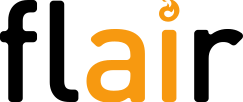

Flair allows to apply state-of-the-art natural language processing (NLP) models to text, such as named entity recognition (NER), sentiment analysis, part-of-speech tagging (PoS), etc. More info: https://github.com/flairNLP/flair

In [ ]:
!pip install flair

from flair.data import Sentence
from flair.models import SequenceTagger

# load tagger
tagger = SequenceTagger.load("flair/pos-english")

# make example sentence
sentence = Sentence("Time flies like an arrow.")

# predict NER tags
tagger.predict(sentence)

# print sentence
print(sentence)

# print predicted NER spans
print('The following NER tags are found:')
# iterate over entities and print
for entity in sentence.get_spans('pos'):
    print(entity)